In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
path = "titanic-passengers.csv"
df = pd.read_csv(path, encoding= "ISO-8859-1", sep=";")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [4]:
df.dtypes

PassengerId      int64
Survived        object
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data cleaning 
finding missing values

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df["Embarked"].fillna("S",inplace=True)
df["Age"].fillna(df["Age"].mean(),inplace=True)
df.drop("Cabin",axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S


In [9]:
encoder=LabelEncoder()
df["Survived"]=encoder.fit_transform(df["Survived"])
df["Embarked"]=encoder.fit_transform(df["Embarked"])
df["Sex"]=encoder.fit_transform(df["Sex"])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.000000,0,0,248740,13.0000,2
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.000000,0,0,348123,7.6500,2
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.000000,0,0,350050,7.8542,2
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.000000,0,4,349909,21.0750,2
4,672,0,1,"Davidson, Mr. Thornton",1,31.000000,1,0,F.C. 12750,52.0000,2
...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,0
887,61,0,3,"Sirayanian, Mr. Orsen",1,22.000000,0,0,2669,7.2292,0
888,535,0,3,"Cacic, Miss. Marija",0,30.000000,0,0,315084,8.6625,2
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,29.699118,0,0,349215,7.8958,2


# 2.Data Visualization

<AxesSubplot:xlabel='Survived', ylabel='count'>

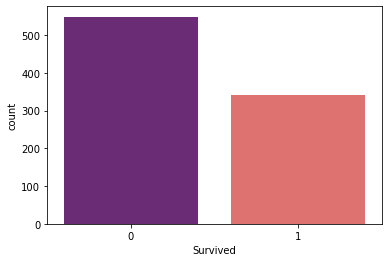

In [10]:
sns.countplot(x='Survived',data=df ,palette="magma")

<AxesSubplot:xlabel='Survived', ylabel='count'>

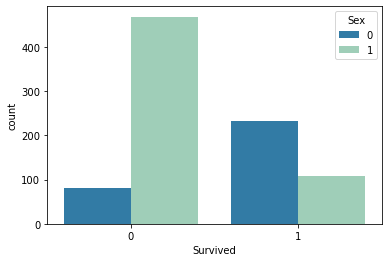

In [11]:
sns.countplot(x="Survived",hue="Sex", data=df ,palette="YlGnBu_r")

<AxesSubplot:xlabel='Survived', ylabel='count'>

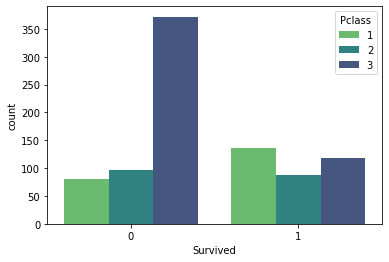

In [12]:
sns.countplot(x="Survived",hue="Pclass", data=df ,palette="viridis_r")

In [13]:
df["Gender"]=df["Sex"].map({"yes": 1, "no": 0})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,2,NaN
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,2,NaN
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,2,NaN
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,2,NaN
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,2,NaN


In [14]:
#convert sex column to numerical values
#drop the columns which are not required
gender=pd.get_dummies(df['Sex'],drop_first=True)
df['Gender']=gender
df.drop(['Name','Sex','Ticket','Embarked'],axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,343,0,2,28.0,0,0,13.0000,1
1,76,0,3,25.0,0,0,7.6500,1
2,641,0,3,20.0,0,0,7.8542,1
3,568,0,3,29.0,0,4,21.0750,0
4,672,0,1,31.0,1,0,52.0000,1


# 1. Apply logistic regression. 

In [15]:
#Seperate Dependent and Independent variables
x=df[['PassengerId','Pclass','Age','SibSp','Parch','Fare','Gender']]
y=df['Survived']


In [16]:
y

0      0
1      0
2      0
3      0
4      0
      ..
886    1
887    0
888    0
889    0
890    1
Name: Survived, Length: 891, dtype: int32

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [18]:
scaler = StandardScaler()

In [19]:
scaled_X_train = scaler.fit_transform(x_train)
scaled_X_test = scaler.transform(x_test)

In [20]:
log=LogisticRegression()

In [21]:
log.fit(x_train,y_train)

LogisticRegression()

In [22]:
predict=log.predict(x_test)

In [23]:
confusion_matrix(y_test,predict)

array([[128,  16],
       [ 21,  58]], dtype=int64)

In [24]:
print("Accuracy={:.2f}".format(log.score(x_test, y_test)))

Accuracy=0.83


<AxesSubplot:xlabel='Age', ylabel='Survived'>

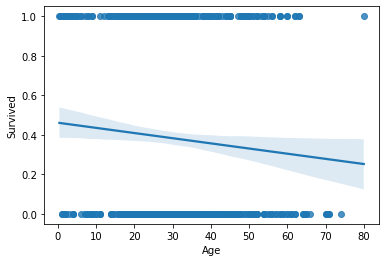

In [25]:
sns.regplot(x='Age',y='Survived',data=df)

<AxesSubplot:xlabel='Gender', ylabel='Survived'>

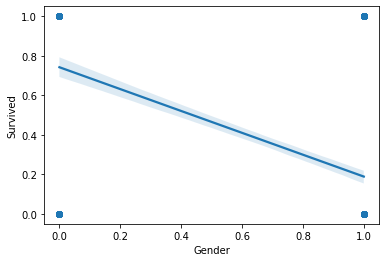

In [26]:
sns.regplot(x='Gender',y='Survived',data=df)

# 2. Use a confusion matrix to validate your model. 

In [27]:
pd.DataFrame(confusion_matrix(y_test,predict),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])

,Predicted No,Predicted Yes
Actual No,128,16
Actual Yes,21,58


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

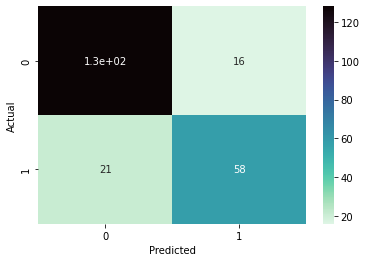

In [28]:
confusion_matrix = pd.crosstab(y_test, predict, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True , cmap="mako_r")

In [29]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       144
           1       0.78      0.73      0.76        79

    accuracy                           0.83       223
   macro avg       0.82      0.81      0.82       223
weighted avg       0.83      0.83      0.83       223



3. Another validation matrix for classification is ROC / AUC. Do your research on them, explain them, and apply them in our case.

# ROC:
 (receiver operating characteristic curve)              
is a graph showing the performance of a classification model at all classification thresholds.                   

This curve plots two parameters:                               
1.True Positive Rate                                                                  
2.False Positive Rate

# AUC:
(Area Under the ROC Curve)            
measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1).

# Build classification model

In [30]:
rf = RandomForestClassifier(max_features=5, n_estimators=500)
rf.fit(x_train, y_train)

RandomForestClassifier(max_features=5, n_estimators=500)

In [31]:
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

# Prediction probabilities 

In [32]:
r_probs = [0 for _ in range(len(y_test))]
rf_probs = rf.predict_proba(x_test)
nb_probs = nb.predict_proba(x_test)

In [33]:
rf_probs = rf_probs[:, 1]
nb_probs = nb_probs[:, 1]

# Calculate AUC
ROC is the receiver operating characteristic AUC is the area under the ROC curve

In [34]:
r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
nb_auc = roc_auc_score(y_test, nb_probs)

# Print AUC scores

In [35]:
print('Prediction: AUC = %.3f' % (r_auc))
print('Random Forest: AUC = %.3f' % (rf_auc))
print('Naive Bayes: AUC = %.3f' % (nb_auc))

Prediction: AUC = 0.500
Random Forest: AUC = 0.838
Naive Bayes: AUC = 0.802


# Calculate ROC curve

In [36]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)

# Calculate ROC curve

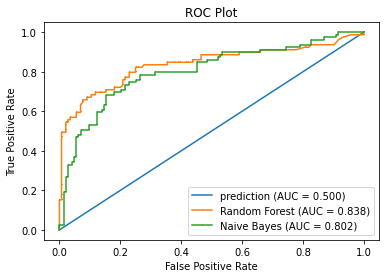

In [37]:
plt.plot(r_fpr, r_tpr, linestyle='-', label='prediction (AUC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker=',', label='Random Forest (AUC = %0.3f)' % rf_auc)
plt.plot(nb_fpr, nb_tpr, marker=',', label='Naive Bayes (AUC = %0.3f)' % nb_auc)

plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend() 
plt.show()